# **Importing Libraries**

In [13]:
# Importing the libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt

# **Loading Data**

In [209]:
df=pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **Data Preprocessing and Cleaning**

In [210]:
df=df[["product_id","product_name","rating","about_product","user_id"]]
df.head()

,product_id,product_name,rating,about_product,user_id
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [211]:
arr=[]
for i in df.values.tolist():
    ids=str(i[-1]).split(",")
    for j in ids:
        temp=i.copy()
        temp[-1]=j
        arr.append(temp)

In [212]:
df = pd.DataFrame(arr, columns=["Product_id","Product_name","Rating","Description",'User_id'])
df.head()

,Product_id,Product_name,Rating,Description,User_id
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35Q
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AHMY5CWJMMK5BJRBBSNLYT3ONILA
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AHCTC6ULH4XB6YHDY6PCH2R772LQ
3,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q


In [213]:
df = df[df['Rating'].apply(lambda x: '|' not in str(x))]
# df["Rating"]=df["Rating"].astype(float)

In [214]:
df.shape

(11495, 5)

In [215]:
df_train=df.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11495 entries, 0 to 11502
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_id    11495 non-null  object
 1   Product_name  11495 non-null  object
 2   Rating        11495 non-null  object
 3   Description   11495 non-null  object
 4   User_id       11495 non-null  object
dtypes: object(5)
memory usage: 538.8+ KB


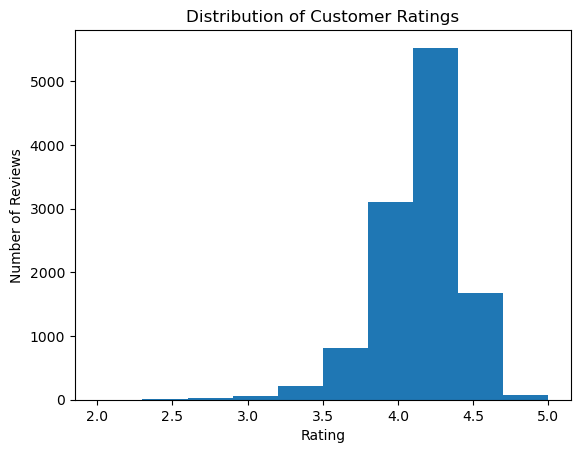

In [69]:
plt.hist(df_train['Rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

In [216]:
Number_of_users = df_train['User_id'].nunique()
unique_user_id = df_train['User_id'].unique()
unique_user_id_list = unique_user_id.tolist()
Number_of_products = df_train['Product_id'].nunique()
unique_product_id = df_train['Product_id'].unique()
unique_product_id_list = unique_product_id.tolist()

In [217]:
dict = {}
for i,product_id in enumerate(unique_product_id_list):
    dict[i] = product_id

inv_dict = {v: k for k, v in dict.items()}

# Adding extra column (product number) to the dataframe
df_train['Product_no'] = df_train['Product_id'].map(inv_dict)

training_set =  np.array(df_train)

In [218]:
# Converting the data into an array with users in lines and products in columns
def convert(data):
    new_data = []
    users=[]
    for id_users in unique_user_id_list:
        num_products = data[:,5][data[:,4] == id_users]
        num_products = num_products.reshape(-1,1)
        id_ratings = data[:,2][data[:,4] == id_users]
        id_ratings = id_ratings.reshape(-1,1)
        num_products = num_products.astype('int')
        id_ratings = id_ratings.astype('float')
        
        ratings = np.zeros(Number_of_products)
        ratings[num_products] = id_ratings

        new_data.append(list(ratings))
        users.append(id_users)
    return new_data,users

In [219]:
training_set,users = convert(training_set)

# Converting the data into Torch tensors
training_set = torch.FloatTensor(training_set)

# Converting the ratings into binary ratings 1 (Liked the product) or 0 (Not Liked the product)
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set >= 3] = 1

# **RBM Model**

In [220]:
# Creating the architecture of the Neural Network for RBM
class RBM():
    def __init__(self, nv, nh, lr):       
        self.W = torch.randn(nh, nv)  
        self.a = torch.randn(1, nh)   
        self.b = torch.randn(1, nv)    
        self.lr = lr
    def sample_h(self, x):   
        wx = torch.mm(x, self.W.t())  
        activation = wx + self.a.expand_as(wx) 
        p_h_given_v = torch.sigmoid(activation)  
        return p_h_given_v, torch.bernoulli(p_h_given_v)   
    def sample_v(self, y):  
        wy = torch.mm(y, self.W)   
        activation = wy + self.b.expand_as(wy) 
        p_v_given_h = torch.sigmoid(activation)  
        return p_v_given_h, torch.bernoulli(p_v_given_h)  
    def train(self, v0, vk, ph0, phk): 
        self.W += ((torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t())*lr  
        self.b += torch.sum((v0 - vk), 0)  
        self.a += torch.sum((ph0 - phk), 0)  

# **Training**

In [221]:
nv = Number_of_products
nh = 100
lr = 0.1
batch_size = 100
rbm = RBM(nv, nh, lr)


# Training the RBM
print('Training started.............')
nb_epoch = 30
loss_data = np.zeros((nb_epoch,2)) 

for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(0, Number_of_users - batch_size, batch_size):
        vk = training_set[id_user:id_user+batch_size]
        v0 = training_set[id_user:id_user+batch_size]
        ph0,_ = rbm.sample_h(v0)
        for k in range(10):
            _,hk = rbm.sample_h(vk)
            _,vk = rbm.sample_v(hk)
            vk[v0<0] = v0[v0<0]  
        phk,_ = rbm.sample_h(vk)
        rbm.train(v0, vk, ph0, phk)
        train_loss += np.sqrt(torch.mean((v0[v0>=0] - vk[v0>=0])**2)) 
        s += 1.
    
    loss_data[epoch-1,0] = epoch
    loss_data[epoch-1,1] = (train_loss/s)
    print('epoch: '+str(epoch)+' Training loss(RMSE): '+str(train_loss/s))

Training started.............
epoch: 1 Training loss(RMSE): tensor(0.9358)
epoch: 2 Training loss(RMSE): tensor(0.1819)
epoch: 3 Training loss(RMSE): tensor(0.0833)
epoch: 4 Training loss(RMSE): tensor(0.0807)
epoch: 5 Training loss(RMSE): tensor(0.0686)
epoch: 6 Training loss(RMSE): tensor(0.0646)
epoch: 7 Training loss(RMSE): tensor(0.0839)
epoch: 8 Training loss(RMSE): tensor(0.0738)
epoch: 9 Training loss(RMSE): tensor(0.0705)
epoch: 10 Training loss(RMSE): tensor(0.0730)
epoch: 11 Training loss(RMSE): tensor(0.0680)
epoch: 12 Training loss(RMSE): tensor(0.0720)
epoch: 13 Training loss(RMSE): tensor(0.0605)
epoch: 14 Training loss(RMSE): tensor(0.0669)
epoch: 15 Training loss(RMSE): tensor(0.0668)
epoch: 16 Training loss(RMSE): tensor(0.0653)
epoch: 17 Training loss(RMSE): tensor(0.0497)
epoch: 18 Training loss(RMSE): tensor(0.0565)
epoch: 19 Training loss(RMSE): tensor(0.0603)
epoch: 20 Training loss(RMSE): tensor(0.0548)
epoch: 21 Training loss(RMSE): tensor(0.0605)
epoch: 22 Tra

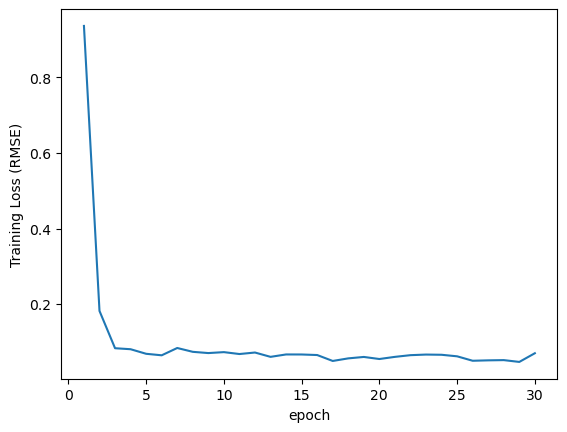

In [222]:
# Plotting of Training Loss
import matplotlib.pyplot as plt
plt.plot(loss_data[:,0], loss_data[:,1])
plt.xlabel('epoch')
plt.ylabel('Training Loss (RMSE)')
plt.show()

In [223]:
# Original data
training_set_array_orig = training_set.numpy()

# **Predictions**

In [224]:
# Function for predictions/product recommendations 
def rbm_pred(x):
    if len(x[x>=0]) > 0:
        _,h = rbm.sample_h(x)
        _,v = rbm.sample_v(h)
    return v

In [225]:
df.User_id.value_counts()

AG5DWPD54QGSLWJ6QUFERLPNAX4Q    11
AE55KTFVNXYFD5FPYWP2OUPEYNPQ    11
AECPFYFQVRUWC3KGNLJIOREFP5LQ    10
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA    10
AHMGAC6QM62UXNEOCZIHLHSXPP2Q    10
                                ..
AF7QEOPISA5J33YVAQWX2EGDEPUQ     1
AHPXWAFSPVEID3MIG3SFU4XFOSLA     1
AF6LSVYUDV7WMLIBPHXHBDSVFDTA     1
AGB2VOIFUR7OVK5G6TMSPV52XHFA     1
AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ     1
Name: User_id, Length: 9042, dtype: int64

In [226]:
index=0
for ind,i in enumerate(users):
    if i=="AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA":
        index=ind
index

160

In [227]:
# Single User's predictions (Product Recommendations by RBM from re-constructed Inputs for the products that he/she did not buy/rate)
    
single_user_number=index
single_user_predictions = rbm_pred(training_set[single_user_number:single_user_number+1])

single_user_predictions = single_user_predictions.numpy()

single_user_orig_inputs = training_set_array_orig[single_user_number:single_user_number+1]

single_user_predictions_df = pd.DataFrame(single_user_predictions, columns=[unique_product_id_list])

In [253]:
preds=np.array(single_user_predictions_df.values.tolist())
row = single_user_predictions_df.iloc[0]

# Get column names where values are greater than 0 for the given row
columns_greater_than_0 = row[row > 0].index.tolist()
# columns_greater_than_0

In [254]:
d=[]
for i in columns_greater_than_0:
    d.append(i[0])

In [232]:
df1 = df_train[df_train['Product_id'].isin(d)]
df1.head()

,Product_id,Product_name,Rating,Description,User_id,Product_no
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35Q,0
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AHMY5CWJMMK5BJRBBSNLYT3ONILA,0
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AHCTC6ULH4XB6YHDY6PCH2R772LQ,0
3,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,0
4,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,High Compatibility : Compatible With iPhone 12...,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,0


In [255]:
description_and_title=df_train[df_train['Product_id'].isin(d)]["Product_name"]+" "+df_train[df_train['Product_id'].isin(d)]["Description"]

In [237]:
df_train[df_train.User_id==users[single_user_number]]

,Product_id,Product_name,Rating,Description,User_id,Product_no
184,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),4.0,"Micro usb cable is 1 meter in length, optimize...",AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,23
352,B09NJN8L25,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,4.0,Micro USB charging cable for android phones an...,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,44
648,B09NKZXMWJ,Flix (Beetel) Usb To Type C Pvc Data Sync And ...,4.0,Durable Pvc Outer Exterior: Pvc Cables Are Ver...,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,81
1388,B0B3N8VG24,FLiX (Beetel USB to Type C PVC Data Sync & 15W...,4.0,FLiX Flow Type C cable offers universal compat...,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,176
1404,B0B3MQXNFB,FLiX (Beetel Flow USB to Micro USB PVC Data Sy...,4.0,FLiX Flow Micro USB cable offers universal com...,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,178
1548,B08P9RYPLR,FLiX (Beetel) USB to iPhone Lightning Textured...,4.0,"TPE material|Output port, 1 meter USB cable le...",AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,196
2002,B08N1WL9XW,FLiX (Beetel) 3in1 (Type C|Micro|Iphone Lighte...,4.0,Proudly Made In India|Blazing Charging - All c...,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,253
3737,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),4.0,"Micro usb cable is 1 meter in length, optimize...",AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,23
3801,B09NL4DJ2Z,FLiX (Beetel) USB to Type C PVC Data Sync & 2A...,4.0,Durable Pvc Outer Exterior: Pvc Cables Are Ver...,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,468
5693,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),4.0,"Micro usb cable is 1 meter in length, optimize...",AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,23


In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(description_and_title)
user_history = df_train[df_train.User_id==users[single_user_number]]

indices = user_history.index.tolist()
# print(indices)
cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)
similarity_scores = list(enumerate(cosine_sim_user[-1]))
similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]
similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Get the indices of the top 5 most similar products
top_products = [i[0] for i in similarity_scores[:5]]
# print(similarity_scores)
recommended_products = df_train.iloc[top_products]['Product_name'].tolist()
id=df_train.iloc[top_products]['Product_id'].tolist()
# Get the reasons for the recommendation
score = [similarity_scores[i][1] for i in range(5)]
d={}
for i in id:
    if i not in d:
        d[i]=1
    else:
        d[i]+=1
i=0
count=6
while i<len(id):
    if d[id[i]]>1:
        while count<len(similarity_scores):
            new_p_i=similarity_scores[count][0]
            id_new=df_train.iloc[new_p_i]['Product_id']
            if id_new not in d:
                d[id[i]]-=1
                d[id_new]=1
                id[i]=id_new
                recommended_product=df_train.iloc[new_p_i]['Product_name']
                recommended_products[i]=recommended_product
                score[i]=similarity_scores[count][1]
                count+=1
                break
            count+=1
    i+=1
results_df = pd.DataFrame({'recommended product': recommended_products,
                            'score recommendation': score,
                            "id":id})
results_df   

,recommended product,score recommendation,id
0,AirCase Protective Laptop Bag Sleeve fits Upto...,0.200860,B07Z1Z77ZZ
1,RESONATE RouterUPS CRU12V2A | Zero Drop | UPS ...,0.181114,B017NC2IPM
2,Tizum High Speed HDMI Cable with Ethernet | Su...,0.128607,B01M4GGIVU
3,Wayona Nylon Braided USB to Lightning Fast Cha...,0.117461,B07JW9H4J1
4,Flix Micro Usb Cable For Smartphone (Black),1.000000,B09NHVCHS9
